## A.2.1 インデント

In [1]:
x = 3

In [2]:
if x > 5:
    print('A') # この行は x > 5 が満たされた時に実行される
    print('B') # この行も x > 5 が満たされた時に実行される

In [3]:
if x > 5:
    print('A') # この行は x > 5 が満たされた時に実行される
print('B')     # この行は条件判断に関係なく実行される

B


In [4]:
x = [1, 2, 3, 4, 5]

# インデックスが2の要素の参照
print('x[2] =', x[2])

# インデックスが2の要素の置き換え
x[2] = 10
print('x =', x)

m = [[1, 2, 3],
     [4, 5, 6]]
print('m[1] =', m[1])
print('m[1][0] =', m[1][0])

x[2] = 3
x = [1, 2, 10, 4, 5]
m[1] = [4, 5, 6]
m[1][0] = 4


In [5]:
x = [1,	2, 3, 4, 5]
print('x =', x)

# インデックスが1から3までの要素
# すなわち，x[1], x[2], x[3]
print('x[1:4] =', x[1:4])

# インデックスが0, 2, 4の要素
print('x[::2] =', x[::2])

x = [1, 2, 3, 4, 5]
x[1:4] = [2, 3, 4]
x[::2] = [1, 3, 5]


In [6]:
y = [str(2*i) for i in x]
print('y =', y)

y = ['2', '4', '6', '8', '10']


In [7]:
y = [str(2*i) for i in range(1, 6)]
print('y =', y)

y = ['2', '4', '6', '8', '10']


In [8]:
# 1, 2, 3を要素とするタプル
x = (1, 2, 3)

# 要素の書き換え
x[2] = 10

TypeError: 'tuple' object does not support item assignment

In [9]:
# 1にA, 2にBを対応させる
x = { 1 : 'A', 2 : 'B' }

# 2に対応している要素の参照
print('x[2] =', x[2])

# Cを3に対応づける
x[3] = 'C'

print('x =', x)

x[2] = B
x = {1: 'A', 2: 'B', 3: 'C'}


## A.2.4 オブジェクト指向

In [10]:
x = [2, 10, 5, 7, 3]
# xの値をソートした結果を出力
print(sorted(x))
# xの値は変わっていないことを確認
print(x)

[2, 3, 5, 7, 10]
[2, 10, 5, 7, 3]


In [11]:
x = [2, 10, 5, 7, 3]
# xに「値をソートせよ」と指示．この返り値はNone．
print(x.sort())
# xの値はソートされている
print(x)

None
[2, 3, 5, 7, 10]


## A.2.5 NumPy の ndarray

In [12]:
a = [1, 2, 3, 4]
print('a =', a)
print('aの型 =', type(a))
print('2 * a =', 2 * a)
# a * a は計算できない(TypeErrorになる)

a = [1, 2, 3, 4]
aの型 = <class 'list'>
2 * a = [1, 2, 3, 4, 1, 2, 3, 4]


In [13]:
import numpy as np

# ndarrayをリストから作成
b = np.array(a)

print('b =', b)
print('bの型 =', type(b))
print('2 * b =', 2 * b)
print('b * b =', b* b)
print('ベクトルbの大きさ =', np.sqrt(np.sum(b*b)))
# もう一つの計算方法
print('ベクトルbの大きさ =', np.linalg.norm(b))

b = [1 2 3 4]
bの型 = <class 'numpy.ndarray'>
2 * b = [2 4 6 8]
b * b = [ 1  4  9 16]
ベクトルbの大きさ = 5.477225575051661
ベクトルbの大きさ = 5.477225575051661


In [14]:
# ベクトルbを2x2の行列に変換
print(b.reshape(2, 2))

[[1 2]
 [3 4]]


In [15]:
# データ数
num_data = 50

# 乱数のシード値を設定
np.random.seed(seed=1)
# num_data個の2次元ベクトルをランダムに生成
vectors = np.random.rand(num_data, 2)

# 各ベクトルの大きさ(ノルム)を計算
vector_norms = np.apply_along_axis(np.linalg.norm, 1, vectors)
# vectorsにあわせてreshape
vector_norms = vector_norms.reshape(num_data, 1)
# 各ベクトルをノルムで割り正規化
normalized_vectors = vectors/vector_norms

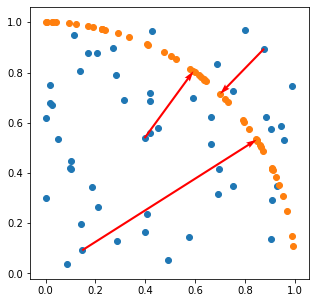

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# グラフのサイズを設定
plt.figure(figsize=(5,5))

# vectorsの要素のx軸成分を取り出す
x = vectors[:,0].flatten()
# vectorsの要素のy軸成分を取り出す
y = vectors[:,1].flatten()
# 正規化前のデータのプロット
plt.scatter(x, y)

# 正規化したデータのプロット
nx = normalized_vectors[:,0].flatten()
ny = normalized_vectors[:,1].flatten()
plt.scatter(nx, ny)

# いくつかのデータに対して正規化の前後を矢印で結ぶ
for i in [2, 4, 12]:
    plt.quiver(x[i], y[i], nx[i]-x[i], ny[i]-y[i], color='red', angles='xy', scale_units='xy', scale=1)
plt.show()

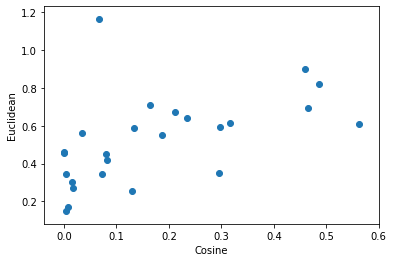

In [17]:
import scipy.spatial.distance as distance

## 正規化されていないベクトルの場合 ##

# vectorsから順に2つずつベクトルを取り出しコサイン距離を計算
c = [distance.cosine(v1, v2) for v1, v2 in vectors.reshape(int(num_data/2), 2, 2)]
# 同様にユークリッド距離を計算
e = [distance.euclidean(v1, v2) for v1, v2 in vectors.reshape(int(num_data/2), 2, 2)]

# コサイン距離とユークリッド距離の関係を散布図で確認
plt.xlabel('Cosine')
plt.ylabel('Euclidean')
plt.scatter(c, e)
plt.show()

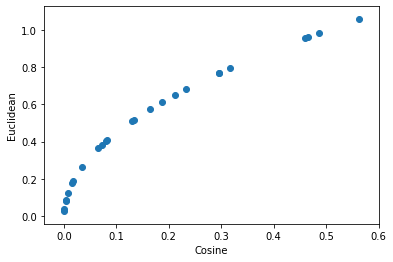

In [18]:
## 正規化されたベクトルの場合 ##

# コサイン距離を計算
c = [distance.cosine(v1, v2) for v1, v2 in normalized_vectors.reshape(int(num_data/2), 2, 2)]
# ユークリッド距離を計算
e = [distance.euclidean(v1, v2) for v1, v2 in normalized_vectors.reshape(int(num_data/2), 2, 2)]

# コサイン距離とユークリッド距離の関係を散布図で確認
plt.xlabel('Cosine')
plt.ylabel('Euclidean')
plt.scatter(c, e)
plt.show()

## A.2.6 with構文

In [19]:
with open('chapter00.py', 'r') as f:
    # ファイルが閉じられているとf.closedがTrueになる
    print('ブロックの中: f.closed = ', f.closed)
print('ブロックの外: f.closed = ', f.closed)

ブロックの中: f.closed =  False
ブロックの外: f.closed =  True


## A.2.7 出力の書式

In [20]:
# 小数点第4位まで表示
print('pi = %.4f' % 3.14159265358979)                                          

print('{}は{}である'.format('我輩', '猫'))

pi = 3.1416
我輩は猫である


## A.2.8 関数の引数

In [21]:
# 引数の組みを返す関数の定義
def f(x=2,y=10):
    return x, y

# 引数がないので既定値が採用される
print('f() =', f())

# キーワード引数でyの値を指定
print('f(y=1) =', f(y=1))

f() = (2, 10)
f(y=1) = (2, 1)


## A.2.9 イテレータとジェネレータ

In [22]:
# リストの要素の和を計算
data = [12, 23, 36]

s = 0
for i in data:
    print(i)
    s += i
print('Total: %d' % s)

12
23
36
Total: 71


In [23]:
def yield_data_in_file(filename):
    with open(filename, 'r') as f:
        while (True):
            # 1行読み込む
            l = f.readline()
            if l == '': break
            # 文字列を整数に変換した値をyield(産出)する
            yield int(l)

In [24]:
g = yield_data_in_file('data/appendix/num.dat')
print(type(g))

<class 'generator'>


In [25]:
# ジェネレータを使用したバージョン
data = yield_data_in_file('data/appendix/num.dat')

s = 0
for i in data:
    print(i)
    s += i
print('Total: %d' % s)

12
23
36
Total: 71


# A.3 トラブルシューティング

### SyntaxError

In [26]:
if x == 0
    print('Zero')

SyntaxError: invalid syntax (<ipython-input-26-9035e6b43c38>, line 1)

### ModuleNotFoundError

In [27]:
import nampy as np

ModuleNotFoundError: No module named 'nampy'

### FileNotFoundError

In [28]:
# わざとエラーを発生させる
import os

os.chdir('data')

with open('chapter00.py', 'r') as f:
    d = f.read()

FileNotFoundError: [Errno 2] No such file or directory: 'chapter00.py'

In [29]:
# カレントディレクトリを確認
print(os.getcwd())

/Users/sato/python/c_2/irpb-files/data


In [30]:
# サンプルデータアーカイブのディレクトリに移動
os.chdir('..')

# ファイルの存在を確認
print(os.path.exists('chapter00.py'))

True


## A.5.1 特異値分解

In [31]:
import numpy as np

X = np.loadtxt('data/ch09/sample.csv', delimiter=',')

In [32]:
from scipy import linalg

# X = U*S*V と3つの行列の積に特異値分解
U, S, V = linalg.svd(X)

In [33]:
# 取り出す成分の次元数
r = 1

# Uのはじめのr列を取り出す
UR = U[:, :r]

# SのR個の対角成分をもつR×R行列を作る
SR = linalg.diagsvd(S[:r], r, r)

# VのはじめのR行を取り出す
VR = V[:r, :]

# UR, SR, VRを掛け合わせ次元削減したデータXRを作成
XR = UR * SR * VR

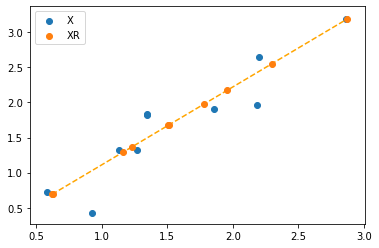

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline                                                              

# オリジナルデータ(X[0][i], X[1][i])をプロット
plt.scatter(X[0], X[1], label='X')

# 次元削減でXから抜き出した成分を示す直線を引く
plt.plot([min(XR[0]), max(XR[0])], [min(XR[1]), max(XR[1])],
         '--', color='orange', zorder=1)

# 次元削減で得られたデータ(XR[0][i], XR[1][i])をプロット
plt.scatter(XR[0], XR[1], label='XR', zorder=2)

# 凡例を追加
plt.legend()

# 図を表示
plt.show()

## A.5.2 語の相互関係の可視化

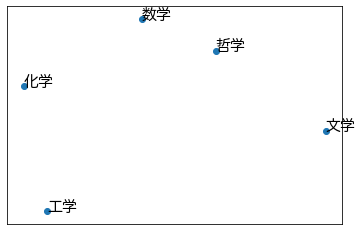

In [35]:
from chapter02 import configure_fonts_for_japanese
import random
from gensim.models import Word2Vec

# 青空文庫で学習済みのモデルの読込
model = Word2Vec.load('data/aozora/w2v-03.model')

# 100語を無作為に抽出
id_list = random.sample(range(len(model.wv.vectors)), 100)

# 表示対象の語
W = ['数学', '哲学', '工学', '化学', '文学']
# 各語をidに変換
W_id = [model.wv.vocab[k].index for k in W]
# 表示対象の語をid_listに追加
id_list.extend(W_id)

# word2vecモデルで語をベクトルに変換
vectors = model.wv.vectors[id_list]

# モジュールの読み込み
from sklearn.manifold import TSNE

# t-SNEで2次元に次元削減
vectors_reduced = TSNE(n_components=2).fit_transform(vectors)

# 表示対象の語(最後の5要素)を抜き出す
W_vectors_reduced = vectors_reduced[-5:]

%matplotlib inline                                                              
import matplotlib.pyplot as plt

# グラフの目盛りを非表示に設定
plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)

# フォントの設定(2章)
configure_fonts_for_japanese()

# 各語をプロット
plt.scatter(W_vectors_reduced[:, 0], W_vectors_reduced[:, 1])

# プロットした位置に語を表示
for i, (x, y) in enumerate(W_vectors_reduced):
    plt.annotate(W[i], xy=(x, y), size=15)